# Direct Marketing Problem <a id="goback"> </a>

![title](marketing.png)

**Abstract:** <br>
There are two main approaches to enterprise marketing: (1) mass campaigns, targeting several general customers, or (2) directed marketing, targeting a specific set of customers. In this competitive world, the mass campaign strategy is not very productive. Nevertheless, there are challenges to directed marketing: finding potential customers is not very easy, although data mining (DM) techniques are providing some assistance in that regard.
The given dataset is from a Portuguese banking institution and was used in their direct marketing campaign to sell term deposits to their customers. You can think of it as cross-selling. The campaign was mostly based on phone calls and the dataset stores general information about customers, details of contacts made with them and the output variable y which indicates whether a term deposit was subscribed to by the customer or not. There are two datasets –
1. Portuguese Bank Data – TRAIN
2. Portuguese Bank Data - TEST

#### References:  <br />
- [SckitLearn Library](https://scikit-learn.org/stable/index.html) <br />
- [Pandas Library : DataFrame](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html) <br />

**Index**
- [Data Import](#importdata)
- [Data Cleaning](#cleandata)
- [Dealing with Categorical Data: OneHotEncoder](#encoding)
- [Model Development](#model)
- [Evaluating Default Models](#evaluate)
- [Hyperparameter Tuning](#hyper)
    - [Grid Search CV ](#grid)
    - [Random Search CV](#random)
- [Model Development with Grid/Random Search Parameters](#modeldev)

In [2]:
# Libraries
# Data Manipulation
import numpy as np
import pandas as pd

#Machine Learning
import sklearn
from sklearn import metrics
from sklearn.model_selection import train_test_split,RandomizedSearchCV,GridSearchCV,cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder

# Visualization
import matplotlib.pyplot as plt 
import plotly.express as px

# To remove warnings 
import warnings
warnings.filterwarnings("ignore")

# Function to evaluate ML Model
def evaluate_model(model,XTrain,YTrain,XTest,YTest):
    #Training Prediction Accuracy
    TrainPred=model.predict(XTrain)
    Training_Acc_Score=metrics.accuracy_score(YTrain,TrainPred)
    
    #Testing Prediction Accuracy
    PredY=model.predict(XTest)
    Testing_Acc_Score=metrics.accuracy_score(YTest,PredY)
    Testing_Class_Report=metrics.classification_report(YTest,PredY)
    Testing_Confusion_Matrix=metrics.confusion_matrix(YTest,PredY)
    
    print("Training Data Accuracy:",Training_Acc_Score,)
    print()
    print("Testing Data Accuracy:\n",Testing_Acc_Score,
         "\nTesting_Class_Report:",Testing_Class_Report,
         "\nTesting_Confusion_Matrix:\n",Testing_Confusion_Matrix)

## Import Datasets <a id="importdata">

In [3]:
Train_csv_loc="Data/Portugese Bank Data - TRAIN.csv"
Test_csv_loc="Data/Portugese Bank Data - TEST.csv"

Train_df=pd.read_csv(Train_csv_loc)
Test_df=pd.read_csv(Test_csv_loc)

Train_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [4]:
Test_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
print("Size of Training data:",Train_df.shape,"\n"
      "Size of Testing data:",Test_df.shape)

Size of Training data: (4521, 17) 
Size of Testing data: (45211, 17)


In [6]:
Train_df.info()
# Test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [7]:
Train_df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [8]:
Train_df["y"].value_counts()

no     4000
yes     521
Name: y, dtype: int64

[Go Back](#goback)

## Data Cleaning <a id="cleandata">

In [6]:
#Data Cleaning
Train_df.shape

(4521, 17)

In [9]:
#Drop Duplicate Rows
# Train_df.shape
Train_df.drop_duplicates()
Train_df.shape

(4521, 17)

In [10]:
# Null values check
Train_df.isnull().sum().sort_values(ascending=True)

age          0
previous     0
pdays        0
campaign     0
duration     0
month        0
day          0
poutcome     0
contact      0
housing      0
balance      0
default      0
education    0
marital      0
job          0
loan         0
y            0
dtype: int64

## Dealing with categorical data points <a id="encoding">

In [11]:
list(Train_df.columns.values)
# CategoricalVariables=['MONTH']
CategoricalVariables=["job","marital","education","default","housing","loan","contact","month","poutcome"]
# OneHotEncoding
Encoding1=OneHotEncoder(sparse=False,handle_unknown='ignore')
# output=Encoding1.fit_transform(Train_df[CategoricalVariables])
# output2=Encoding1.fit_transform(Test_df[CategoricalVariables])

output=pd.DataFrame(Encoding1.fit_transform(Train_df[CategoricalVariables]),
                    columns=Encoding1.get_feature_names_out(),
                    index=Train_df.index)
output2=pd.DataFrame(Encoding1.fit_transform(Test_df[CategoricalVariables]),
                     columns=Encoding1.get_feature_names_out(),
                     index=Test_df.index)
# Encoding1.get_feature_names_out()
print(output.shape,output2.shape,Train_df.shape,Test_df.shape)

Encoded_Train_df=pd.concat([Train_df,output],axis=1)
Encoded_Test_df=pd.concat([Test_df,output2],axis=1)

Mismatch_Columns=list(set(output2.columns)-set(output.columns))

#Add these columns to Train Dataset
# Encoded_Train_df[Mismatch_Columns]=0

(4521, 44) (45211, 44) (4521, 17) (45211, 17)


In [12]:
Mismatch_Columns=list(set(output2.columns)-set(output.columns))
print(Mismatch_Columns)

[]


In [13]:
print(Encoded_Train_df.shape,Encoded_Test_df.shape)
# Successfully columns are same

(4521, 61) (45211, 61)


In [14]:
# Remove Categorical Variables as Encoded dataset added
Encoded_Train_df=Encoded_Train_df.drop(columns=CategoricalVariables)
Encoded_Test_df=Encoded_Test_df.drop(columns=CategoricalVariables)
print(Encoded_Train_df.shape,Encoded_Test_df.shape)

(4521, 52) (45211, 52)


[Go Back](#goback)

## Model Development <a id="model"> </a>

In [15]:
# #Train test Split
# XTrain,XTest,YTrain,YTest=train_test_split(TrainX,TrainY,test_size=0.3)

#Dividing Dataset into Training and Testing Data
TrainX=Encoded_Train_df.drop(columns="y",axis=1).copy()
TrainY=Encoded_Train_df[['y']]

TestX=Encoded_Test_df.drop(columns="y",axis=1).copy()
TestY=Encoded_Test_df[['y']].copy()

In [14]:
# TrainY=Train_df["y"].astype(str)
# TrainY=TrainY.apply(str)

In [16]:
Encoded_Train_df.head()

,age,balance,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,30,1787,19,79,1,-1,0,no,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,33,4789,11,220,1,339,4,no,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,35,1350,16,185,1,330,1,no,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,30,1476,3,199,4,-1,0,no,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,59,0,5,226,1,-1,0,no,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [17]:
#Decision Tree
dt=DecisionTreeClassifier()
dt.fit(TrainX,TrainY)

DecisionTreeClassifier()

In [18]:
# Random Forest
rt=RandomForestClassifier()
rt.fit(TrainX,TrainY)

RandomForestClassifier()

[Go Back](#goback)

## Evaluating Default Models <a id="evaluate"> </a>
Training file taking as TrainDataset <br>
Testing file taking as TestDataset as Y(Target) is given

In [19]:
evaluate_model(dt,TrainX,TrainY,TestX,TestY)

Training Data Accuracy: 1.0

Testing Data Accuracy:
 0.8838335803233727 
Testing_Class_Report:               precision    recall  f1-score   support

          no       0.94      0.93      0.93     39922
         yes       0.50      0.53      0.52      5289

    accuracy                           0.88     45211
   macro avg       0.72      0.73      0.73     45211
weighted avg       0.89      0.88      0.89     45211
 
Testing_Confusion_Matrix:
 [[37141  2781]
 [ 2471  2818]]


In [20]:
evaluate_model(rt,TrainX,TrainY,TestX,TestY)

Training Data Accuracy: 1.0

Testing Data Accuracy:
 0.9117250226714737 
Testing_Class_Report:               precision    recall  f1-score   support

          no       0.92      0.98      0.95     39922
         yes       0.74      0.38      0.50      5289

    accuracy                           0.91     45211
   macro avg       0.83      0.68      0.73     45211
weighted avg       0.90      0.91      0.90     45211
 
Testing_Confusion_Matrix:
 [[39207   715]
 [ 3276  2013]]


[Go Back](#goback)

## Hyperparameter Tuning <a id="hyper"> </a>
### Grid Search CV  <a id="grid"> </a>

In [21]:
%%time
# GridSearchCV : Exhaustive Approach

from sklearn.model_selection import GridSearchCV

#Decision Tree
dt_para_set={'criterion':['gini','entropy'],
         'max_depth':range(5,30,5),
         'min_samples_leaf':range(10,300,10)}


dt_GridSearchCV=GridSearchCV(dt,dt_para_set)
dt_GridSearchCV.fit(TrainX,TrainY)
print("Best set of parameters for dt: ",dt_GridSearchCV.best_params_,
      "\nBest Score : ",dt_GridSearchCV.best_score_)

print()
print()

#Random Forest
rt_para_set={'n_estimators':range(50,200,50),
            'criterion':['entropy','gini','log_loss'],
            'max_depth':range(5,30,5),
            'min_samples_leaf':range(10,300,10)}
rt_GridSearchCV=GridSearchCV(rt,rt_para_set)
rt_GridSearchCV.fit(TrainX,TrainY)
print('Best set of parameters for rt:',rt_GridSearchCV.best_params_,
     '\nBest score: ',rt_GridSearchCV.best_score_)

Best set of parameters for dt:  {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 30} 
Best Score :  0.8980306067569549


Best set of parameters for rt: {'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 10, 'n_estimators': 50} 
Best score:  0.8962611841783602
CPU times: total: 18min 34s
Wall time: 18min 36s


In [22]:
#Grid CV Test Accuracy for Decision Tree and Random Forest
print('Decision Tree Test Accuracy: ',dt_GridSearchCV.score(TestX,TestY))
print('RandomForest Test Accuracy:',rt_GridSearchCV.score(TestX,TestY))

Decision Tree Test Accuracy:  0.8962199464732035
RandomForest Test Accuracy: 0.8957554577425848


[Go Back](#goback)

### Random Search CV  <a id="random"> </a>

In [23]:
# RandomizedSearchCV : Randomized Approach

from sklearn.model_selection import RandomizedSearchCV

#Decision Tree
dt_RandomizedSearchCV=RandomizedSearchCV(dt,dt_para_set)
dt_RandomizedSearchCV.fit(TrainX,TrainY)
print("Best set of parameters for dt: ",dt_RandomizedSearchCV.best_params_,
      "\nBest Score : ",dt_RandomizedSearchCV.best_score_)

print()
print()

#Random Forest
rt_RandomizedSearchCV=RandomizedSearchCV(rt,rt_para_set)
rt_RandomizedSearchCV.fit(TrainX,TrainY)

print("Best set of parameters for rt: ",rt_RandomizedSearchCV.best_params_,
      "\nBest Score : ",rt_RandomizedSearchCV.best_score_)

Best set of parameters for dt:  {'min_samples_leaf': 30, 'max_depth': 15, 'criterion': 'gini'} 
Best Score :  0.8933877670757345


Best set of parameters for rt:  {'n_estimators': 50, 'min_samples_leaf': 10, 'max_depth': 25, 'criterion': 'gini'} 
Best Score :  0.8942697892729672


In [24]:
#Random CV Test Accuracy for Decision Tree and Random Forest
print('Decision Tree Test Accuracy: ',dt_RandomizedSearchCV.score(TestX,TestY))
print('RandomForest Test Accuracy:',rt_RandomizedSearchCV.score(TestX,TestY))

Decision Tree Test Accuracy:  0.8978788347968415
RandomForest Test Accuracy: 0.897392227555241


[Go Back](#goback)

## Model Development with Grid/Random Search  Parameters <a id="modeldev"> </a>

In [25]:
#Using Grid and Random Search CV parameters for modelling
#Decision Tree

dt_using_Grid=DecisionTreeClassifier(**dt_GridSearchCV.best_params_)
dt_using_Grid.fit(TrainX,TrainY)
dt_using_Rand=DecisionTreeClassifier(**dt_RandomizedSearchCV.best_params_)
dt_using_Rand.fit(TrainX,TrainY)

print("DECISION TREE CLASSIFIER")
print("Using Grid Search CV \n")
evaluate_model(dt_using_Grid,TrainX,TrainY,TestX,TestY)
print("-------------------------------------------------------------------------------------------------")
print("Using Random Search CV \n")
evaluate_model(dt_using_Rand,TrainX,TrainY,TestX,TestY)


DECISION TREE CLASSIFIER
Using Grid Search CV 

Training Data Accuracy: 0.9073213890732139

Testing Data Accuracy:
 0.8962199464732035 
Testing_Class_Report:               precision    recall  f1-score   support

          no       0.91      0.98      0.94     39922
         yes       0.62      0.29      0.40      5289

    accuracy                           0.90     45211
   macro avg       0.77      0.64      0.67     45211
weighted avg       0.88      0.90      0.88     45211
 
Testing_Confusion_Matrix:
 [[38959   963]
 [ 3729  1560]]
-------------------------------------------------------------------------------------------------
Using Random Search CV 

Training Data Accuracy: 0.9108604291086043

Testing Data Accuracy:
 0.8978788347968415 
Testing_Class_Report:               precision    recall  f1-score   support

          no       0.92      0.97      0.94     39922
         yes       0.60      0.39      0.47      5289

    accuracy                           0.90     45211
   ma

In [26]:
#Using Grid and Random Search CV parameters for modelling
#Random Forest
rt_using_Grid=RandomForestClassifier(**rt_GridSearchCV.best_params_)
rt_using_Grid.fit(TrainX,TrainY)
rt_using_Rand=RandomForestClassifier(**rt_RandomizedSearchCV.best_params_)
rt_using_Rand.fit(TrainX,TrainY)

print("RANDOM FOREST CLASSIFIER")
print("Using Grid Search CV \n")
evaluate_model(rt_using_Grid,TrainX,TrainY,TestX,TestY)
print("-------------------------------------------------------------------------------------------------")
print("Using Random Search CV \n")
evaluate_model(rt_using_Rand,TrainX,TrainY,TestX,TestY)

RANDOM FOREST CLASSIFIER
Using Grid Search CV 

Training Data Accuracy: 0.9075425790754258

Testing Data Accuracy:
 0.8973701090442592 
Testing_Class_Report:               precision    recall  f1-score   support

          no       0.90      0.99      0.94     39922
         yes       0.75      0.18      0.29      5289

    accuracy                           0.90     45211
   macro avg       0.83      0.59      0.62     45211
weighted avg       0.88      0.90      0.87     45211
 
Testing_Confusion_Matrix:
 [[39607   315]
 [ 4325   964]]
-------------------------------------------------------------------------------------------------
Using Random Search CV 

Training Data Accuracy: 0.90687900906879

Testing Data Accuracy:
 0.8984317975713875 
Testing_Class_Report:               precision    recall  f1-score   support

          no       0.90      0.99      0.95     39922
         yes       0.77      0.19      0.30      5289

    accuracy                           0.90     45211
   macr

[Go Back](#goback)

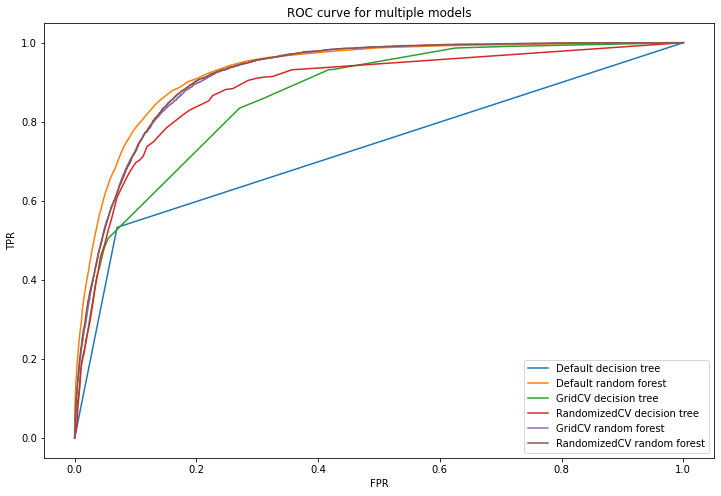

In [27]:
# Estimated ROC Curves by transforming dataset into 0,1
Trail=TestY
Trail=Trail.replace(to_replace=['no','yes'],value=[0,1])

PredY=dt.predict_proba(TestX)[:,1]
fpr1, tpr1, _ = metrics.roc_curve(Trail,PredY)

PredY=rt.predict_proba(TestX)[:,1]
fpr2, tpr2, _ = metrics.roc_curve(Trail,PredY)

PredY=dt_using_Grid.predict_proba(TestX)[:,1]
fpr3, tpr3, _ = metrics.roc_curve(Trail,PredY)

PredY=dt_using_Rand.predict_proba(TestX)[:,1]
fpr4, tpr4, _ = metrics.roc_curve(Trail,PredY)

PredY=rt_using_Grid.predict_proba(TestX)[:,1]
fpr5, tpr5, _ = metrics.roc_curve(Trail,PredY)

PredY=rt_using_Rand.predict_proba(TestX)[:,1]
fpr6, tpr6, _ = metrics.roc_curve(Trail,PredY)

plt.figure(figsize=(12,8))
plt.plot(fpr1, tpr1,label="Default decision tree")
plt.plot(fpr2, tpr2,label="Default random forest")
plt.plot(fpr3, tpr3,label="GridCV decision tree")
plt.plot(fpr4, tpr4,label="RandomizedCV decision tree")
plt.plot(fpr5, tpr5,label="GridCV random forest")
plt.plot(fpr6, tpr6,label="RandomizedCV random forest")
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve for multiple models')
plt.legend()

plt.show()

![marketing](marketing2.png)

Using the default model, we will be able to predict the outcomes better as Precision value is the best. <br>
Precision is the **True Positives/(True Positives + False Positives)** <br>
The company should focus on geting minimum False positive value, as they could be potential customers which might lead to a term deposit at Portuguese Bank. Getting higher False Positive values can decerease the scope of Direct marketing to potential customers.